<div style="color: #40E0D0; font-family: Cambria, serif; text-align: center; margin: 20px;">

<div style="font-size: 32px; font-weight: bold; margin-bottom: 15px;">UBS AG $4,593,000 Trigger Callable Contingent Yield Notes</div>

<div style="font-size: 24px; font-weight: bold; margin-bottom: 15px;">Linked to the common stock of U.S. Bancorp due August 13, 2026</div>

<div style="font-style: italic; font-size: 16px;">-Valuation report Python notebook by Yadvesh, Krish and Mayank</div>

</div>

----

<div style="border-bottom: 3px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 28px;">I) Introduction ==></span>
</div>

<div style="border-bottom: 2px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 20px;">1) Below are the Key Dates of the Note:</span>
</div>

![](./Images/key_dates.png)

<div style="border-bottom: 2px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 20px;">2) Below are the Note Offering:</span>
</div>

![](./Images/note_offering.png)

<div style="border-bottom: 2px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 20px;">3) Below are the Observation Dates and Coupon Payment Dates:</span>
</div>

![](./Images/obs_cpn_dates.png)

-----

<div style="border-bottom: 3px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 28px;">II) Bloomberg Data (Risk-Free Rates(OIS), Dividend Yield, Volatality Matrix) is as follows ==> </span>
</div>

<div style="border-bottom: 2px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 20px;">1) Risk Free Rate (OIS Rate):</span>
</div>

![](./Images/usd-ois.png)

---

<div style="border-bottom: 2px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 20px;">2) Dividend Yield:</span>
</div>

![](./Images/div.png)

---

<div style="border-bottom: 2px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 20px;">3) Implied Volatality Matrix:</span>
</div>

![](./Images/vols.png)

---

<div style="border-bottom: 2px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 28px;">III) Getting the Risk-free rates from discount factors above ==></span>
</div>

In [23]:
# Importing Necessary Libraries
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# function to get fractional difference between two dates
def get_year_fraction(start_date, end_date):
    if isinstance(start_date, str):
        start_date = datetime.strptime(start_date, "%Y-%m-%d")
    if isinstance(end_date, str):
        end_date = datetime.strptime(end_date, "%Y-%m-%d")
    
    days_diff = (end_date - start_date).days
    
    year_frac = days_diff / 365
    
    return year_frac

In [3]:
# Key dates
T_0 = "2024-08-08"
T_1 = "2024-08-13"
T_2 = "2026-08-10"
T_3 = "2026-08-13"

# Discount Factors at Key Dates
DF_0 = 1
DF_2 = 0.928096

# DF_1 and DF_3 needs to be calculated using Interpolation
# We have:
dt_2024_08_15 = "2024-08-15"
DF_2024_08_15 = 0.998968
dt_2027_08_09 = "2027-08-09"
DF_2027_08_09 = 0.900124

# Now using Interpolation we have:
DF_1 = DF_0 + (DF_2024_08_15 - DF_0)*(get_year_fraction(T_1, T_0))/(get_year_fraction(dt_2024_08_15, T_0))
print(f"The Value of DF_1 is: {DF_1:.6f}\n")
DF_3 = DF_2 + (DF_2027_08_09 - DF_2)*(get_year_fraction(T_3, T_2))/(get_year_fraction(dt_2027_08_09, T_2))
print(f"The Value of DF_3 is: {DF_3:.6f}")

The Value of DF_1 is: 0.999263

The Value of DF_3 is: 0.927865


<div style="border-bottom: 2px solid black; display: inline-block; margin-bottom: 20px;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 20px;">The Discount Factor Table after Linear Interpolation Looks like this</span>
</div>

<div style="font-family: Cambria, serif;">

| Keys | Dates     | DF        |
|------|-----------|-----------|
| T_0  | 8/8/2024  | 1.000000  |
| T_1  | 8/13/2024 | 0.999263  |
| T_2  | 8/10/2026 | 0.928096  |
| T_3  | 8/13/2026 | 0.927865  |

</div>

In [4]:
# function to get r(0,T) from the discount factors DF
def r_from_DF(DF, T, T_0):
    dt = get_year_fraction(T_0, T)
    r = -np.log(DF)/dt
    return r, dt

In [5]:
r_T0_T1, T0_T1 = r_from_DF(DF_1, T_1, T_0)
print(f"The Value of continuously compounded risk free rate between T_0 and T_1(r_T0_T1) is: {r_T0_T1:.8f}\n")
r_T0_T2, T0_T2 = r_from_DF(DF_2, T_2, T_0)
print(f"The Value of continuously compounded risk free rate between T_0 and T_2(r_T0_T2) is: {r_T0_T2:.8f}\n")
r_T0_T3, T0_T3 = r_from_DF(DF_3, T_3, T_0)
print(f"The Value of continuously compounded risk free rate between T_0 and T_3(r_T0_T3) is: {r_T0_T3:.8f}\n")

The Value of continuously compounded risk free rate between T_0 and T_1(r_T0_T1) is: 0.05383127

The Value of continuously compounded risk free rate between T_0 and T_2(r_T0_T2) is: 0.03720811

The Value of continuously compounded risk free rate between T_0 and T_3(r_T0_T3) is: 0.03717961



<div style="border-bottom: 2px solid black; display: inline-block; margin-bottom: 20px;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 20px;">The Discount Factor Table after Linear Interpolation Looks like this</span>
</div>

<div style="font-family: Cambria, serif;">

| Keys | Dates     | DF        | delta(T_x, T_0) | r(0,T_x)   |
|------|-----------|-----------|-----------------|------------|
| T_0  | 8/8/2024  | 1.000000  | 0.00000000     | 0.00000000 |
| T_1  | 8/13/2024 | 0.999263  | 0.01369863     | 0.05383127 |
| T_2  | 8/10/2026 | 0.928096  | 2.00547945     | <span style="background-color: green;">0.03720811</span> |
| T_3  | 8/13/2026 | 0.927865  | 2.01369863     | 0.03717961 |

</div>

In [6]:
# Now we need to calculate teh forward rate F(T_1,T_3)
T1_T3 = get_year_fraction(T_1, T_3)
F_T1_T3 = ((r_T0_T3*T0_T3) - (r_T0_T1*T0_T1))/T1_T3
print(f"The Value of continuously compounded Forward rate between T_1 and T_3(F_T1_T3) is: {F_T1_T3:.8f}\n")

The Value of continuously compounded Forward rate between T_1 and T_3(F_T1_T3) is: 0.03706556



---

<div style="border-bottom: 2px solid black; display: inline-block; margin-bottom: 20px;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 20px;">1) The Discount Factor Table after Linear Interpolation Looks like this:</span>
</div>

<div style="font-family: Cambria, serif;">

| Keys | Dates     | DF        | delta(T_x, T_0) | r(0,T_x)   | F(T_x1,T_x2)   |
|------|-----------|-----------|-----------------|------------|------------|
| T_0  | 8/8/2024  | 1.000000  | 0.00000000     | 0.00000000 | -  |
| T_1  | 8/13/2024 | 0.999263  | 0.01369863     | 0.05383127 | -  |
| T_2  | 8/10/2026 | 0.928096  | 2.00547945     | <span style="background-color: green;">0.03720811</span> | -  |
| T_3  | 8/13/2026 | 0.927865  | 2.01369863     | 0.03717961 | <span style="background-color: green;">0.03706556</span> |

</div>

---

<div style="border-bottom: 2px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 20px;">2) The continuous dividend yield 'D' from bloomberg data is 4.842% or 0.04842</span>
</div>

---

<div style="border-bottom: 2px solid black; display: inline-block; margin-bottom: 20px;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 20px;">2) The Moneyness and Volatility Matrix Looks like this:</span>
</div>

<div style="font-family: Cambria, serif;">

| Moneyness | Implied Volatility (24M) |
|-----------|------------------|
| 60.00     | 37.779%         |
| 65.00     | 36.529%         |
| 70.00     | 34.846%         |
| 75.00     | 33.187%         |
| 80.00     | 31.841%         |
| 85.00     | 30.770%         |
| 90.00     | 29.896%         |
| 95.00     | 29.334%         |
| 100.00    | 28.662%         |
| 105.00    | 28.035%         |

</div>

---

<div style="border-bottom: 2px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 28px;">IV) Now Calculating the Value of the Note using Binomial Trees ==></span>
</div>

In [7]:
# note features that will go in the functions to callculate teh value of the note

# initial stock price ($)
S0 = 41.76

# coupon barrier and downside threshold ($)
B = 0.6*S0

# contingent coupon per observation date ($)
coupon_payment = 25.625

# principal amount per note ($)
principal = 1000

# share delivery coefficient if below downside threshold at maturity
share_delivery_amount = 23.9464

# continously compounded risk-free rate(T_0 to T_2) for p calculation
r1 = r_T0_T2

# continously compounded forward rate(T_1 to T_3) for discounting
r2 = F_T1_T3

# continuous dividend yield
D = 0.04842

# implied volatility at 80 Moneyness
sigma = 0.31841

# number of time steps
N = 1000

# fractional time between T_0 and T_2 for p calculation
T0_T2

# delta dt per time step between T_0 and T_2 for p calculation
dt02 = T0_T2/N

# fractional time between T_1 and T_3 for discounting
T1_T3

# delta dt per time step between T_1 and T_3 for discounting
dt13 = T1_T3/N

In [8]:
sigma_moneyness = {
    60.00: 0.37779,
    65.00: 0.36529,
    70.00: 0.34846,
    75.00: 0.33187,
    80.00: 0.31841,
    85.00: 0.30770,
    90.00: 0.29896,
    95.00: 0.29334,
    100.00: 0.28662,
    105.00: 0.28035
}

In [9]:
# getting the call start step after which the note becomes callable (6 months)
# call start date  after 6 months from "2024-08-08" is "2025-02-08"
call_start_date = "2025-02-08"
call_start_time = get_year_fraction(T_0, call_start_date)      
call_start_step = int(call_start_time/dt02)
print(call_start_step)

251


In [10]:
# coupon dates stored as list to be used in function to give out coupon payments at these dates if stock is greater than coupon barrier
observation_dates = [
    '2024-11-08',
    '2025-02-10',
    '2025-05-08',
    '2025-08-08',
    '2025-11-10',
    '2026-02-09',
    '2026-05-08'
]

# calculating observation times (year fractions from T_0)
observation_times = [get_year_fraction(T_0, date) for date in observation_dates]

# calculate observation steps (the steps at which observation dates occur)
observation_steps = [int(time / dt02) for time in observation_times]
for date, step in zip(observation_dates, observation_steps):
    print(f"{date}: Observation Step {step}")

2024-11-08: Observation Step 125
2025-02-10: Observation Step 254
2025-05-08: Observation Step 372
2025-08-08: Observation Step 498
2025-11-10: Observation Step 627
2026-02-09: Observation Step 751
2026-05-08: Observation Step 871


In [11]:
# defining h(x) function for Leisen-Reimer model
def h(x, N):
    func_value = 0.5 + np.sign(x) * np.sqrt(0.25 - 0.25 * np.exp(-((x / (N + 1/3)) ** 2) * (N + 1/6)))
    return func_value

In [12]:
# function to build the stock tree
def Stock_tree(N, S0, B, dt02, sigma, r1, D, T0_T2, model):

    S = np.zeros([N+1, N+1])

    # choice of model
    if model == 'CRR':
        u = np.exp(sigma*np.sqrt(dt02))
        d = np.exp(-sigma*np.sqrt(dt02))
        p = (np.exp((r1-D)*dt02)-d)/(u-d)

    elif model == 'RB':
        u = np.exp((r1 - D - 0.5*sigma**2)*dt02 + sigma*np.sqrt(dt02))
        d = np.exp((r1 - D - 0.5*sigma**2)*dt02 - sigma*np.sqrt(dt02))
        p = (np.exp((r1-D)*dt02)-d)/(u-d)

    elif model == 'LR':
        d1 = (np.log(S0/B) + (r1 - D + 0.5*sigma**2)*T0_T2)/(sigma*np.sqrt(T0_T2))
        d2 = d1 - sigma*np.sqrt(T0_T2)
        q1 = h(d2, N)
        q2 = h(d1, N)
        u = np.exp((r1 - D) * dt02) * (q2 / q1)
        d = (np.exp((r1 - D) * dt02) - q1 * u) / (1 - q1)
        p = q1

    # setting S0 as initial stock price
    S[0, 0] = S0

    # building the stock tree
    for i in range(1, N + 1):
        S[i,0] = S[i-1,0] * d
        for j in range(1,i+1):
            S[i,j] = S[i-1,j-1] * u

    return S, p, u, d, model

In [13]:
# function to calculate the value of the note
def Note_Value(S, p, N, dt13, call_start_step, observation_steps, r2, model):

    value_tree = np.zeros_like(S)

    # determine Payoffs at Maturity
    for j in range(N+1):
        S_T = S[N, j]
        if S_T >= B:
            # receive principal back plus coupon if above barrier
            value_tree[N, j] = principal + coupon_payment
        else:
            # receive share delivery amount times stock price
            value_tree[N, j] = share_delivery_amount*S_T

    # applying backward Induction
    for i in range(N-1, -1, -1):
        for j in range(i + 1):
            S_t = S[i, j]
            # calculating expected continuation value
            continuation_value = np.exp(-r2 * dt13)*(p*value_tree[i+1, j+1] + (1-p)*value_tree[i+1, j])

            # add contingent coupon if barrier is breached
            if i in observation_steps and S_t >= B:
                continuation_value = continuation_value + coupon_payment

            # check if issuer will call the note
            if i in observation_steps and i >= call_start_step:
                # calculate call payoff
                call_payoff = principal + coupon_payment

                # issuer will call if continuation value is larger than call_payoff
                node_value = min(call_payoff, continuation_value)

            else:
                node_value = continuation_value

            value_tree[i, j] = node_value

    # discounting back to the note's present value
    note_value = value_tree[0, 0]

    moneyness = next(k for k, v in sigma_moneyness.items() if v == sigma)
    print(f"The estimated fair value of the note at moneyness of {moneyness} for {N} time steps and {model} model is: ${note_value:.4f}")
    return note_value

In [14]:
# build the stock tree for N=1000 time steps CRR model
S, p, u, d, model = Stock_tree(N, S0, B, dt02, sigma, r1, D, T0_T2, model='CRR')

In [15]:
# calculate the value of the note for N=1000 time steps CRR model
note_value = Note_Value(S, p, N, dt13, call_start_step, observation_steps, r2, model)

The estimated fair value of the note at moneyness of 80.0 for 1000 time steps and CRR model is: $976.1561


In [16]:
# build the stock tree for N=1000 time steps RB model
S, p, u, d, model = Stock_tree(N, S0, B, dt02, sigma, r1, D, T0_T2, model='RB')

In [17]:
# calculate the value of the note for N=1000 time steps RB model
note_value = Note_Value(S, p, N, dt13, call_start_step, observation_steps, r2, model)

The estimated fair value of the note at moneyness of 80.0 for 1000 time steps and RB model is: $977.9710


In [18]:
# build the stock tree for N=1000 time steps LR model
S, p, u, d, model = Stock_tree(N, S0, B, dt02, sigma, r1, D, T0_T2, model='LR')

In [19]:
# calculate the value of the note for N=1000 time steps LR model
note_value = Note_Value(S, p, N, dt13, call_start_step, observation_steps, r2, model)

The estimated fair value of the note at moneyness of 80.0 for 1000 time steps and LR model is: $980.4148


<div style="border-bottom: 2px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 28px;">V) Sensitivity Analysis w.r.t to different Moneyness(different implied volatility) ==></span>
</div>

<div style="border-bottom: 2px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 28px;">VI) Increasing the Number of Steps from 100 till 10000 and plotting the value graph for 80 Moneyness 'CRR' Model==></span>
</div>

In [ ]:
N_values = range(50, 10000, 3)
CRR_values = []

for i in N_values:
    S, p, u, d, model = Stock_tree(i, S0, B, dt02, sigma, r1, D, T0_T2, model='CRR')
    note_value = Note_Value(S, p, i, dt13, call_start_step, observation_steps, r2, model)
    CRR_values.append(note_value)

The estimated fair value of the note at moneyness of 80.0 for 50 time steps and CRR model is: $1021.8304
The estimated fair value of the note at moneyness of 80.0 for 53 time steps and CRR model is: $1021.6032
The estimated fair value of the note at moneyness of 80.0 for 56 time steps and CRR model is: $1021.3757
The estimated fair value of the note at moneyness of 80.0 for 59 time steps and CRR model is: $1021.1486
The estimated fair value of the note at moneyness of 80.0 for 62 time steps and CRR model is: $1020.9205
The estimated fair value of the note at moneyness of 80.0 for 65 time steps and CRR model is: $1020.6935
The estimated fair value of the note at moneyness of 80.0 for 68 time steps and CRR model is: $1020.4637
The estimated fair value of the note at moneyness of 80.0 for 71 time steps and CRR model is: $1020.2372
The estimated fair value of the note at moneyness of 80.0 for 74 time steps and CRR model is: $1020.0041
The estimated fair value of the note at moneyness of 80

In [38]:
# assuming note value to be $981.50
CRR_errors = [(value - 981.50) for value in CRR_values]

In [39]:
df_crr = pd.DataFrame({
    'N': N_values,
    'Note_Value': CRR_values,
    'Errors': CRR_errors
})

# Add better column names and reset index if needed
df_crr = df_crr.reset_index(drop=True)
df_crr.head()

,N,Note_Value,Errors
0,50,1021.830439,40.330439
1,53,1021.603206,40.103206
2,56,1021.375738,39.875738
3,59,1021.148606,39.648606
4,62,1020.920487,39.420487


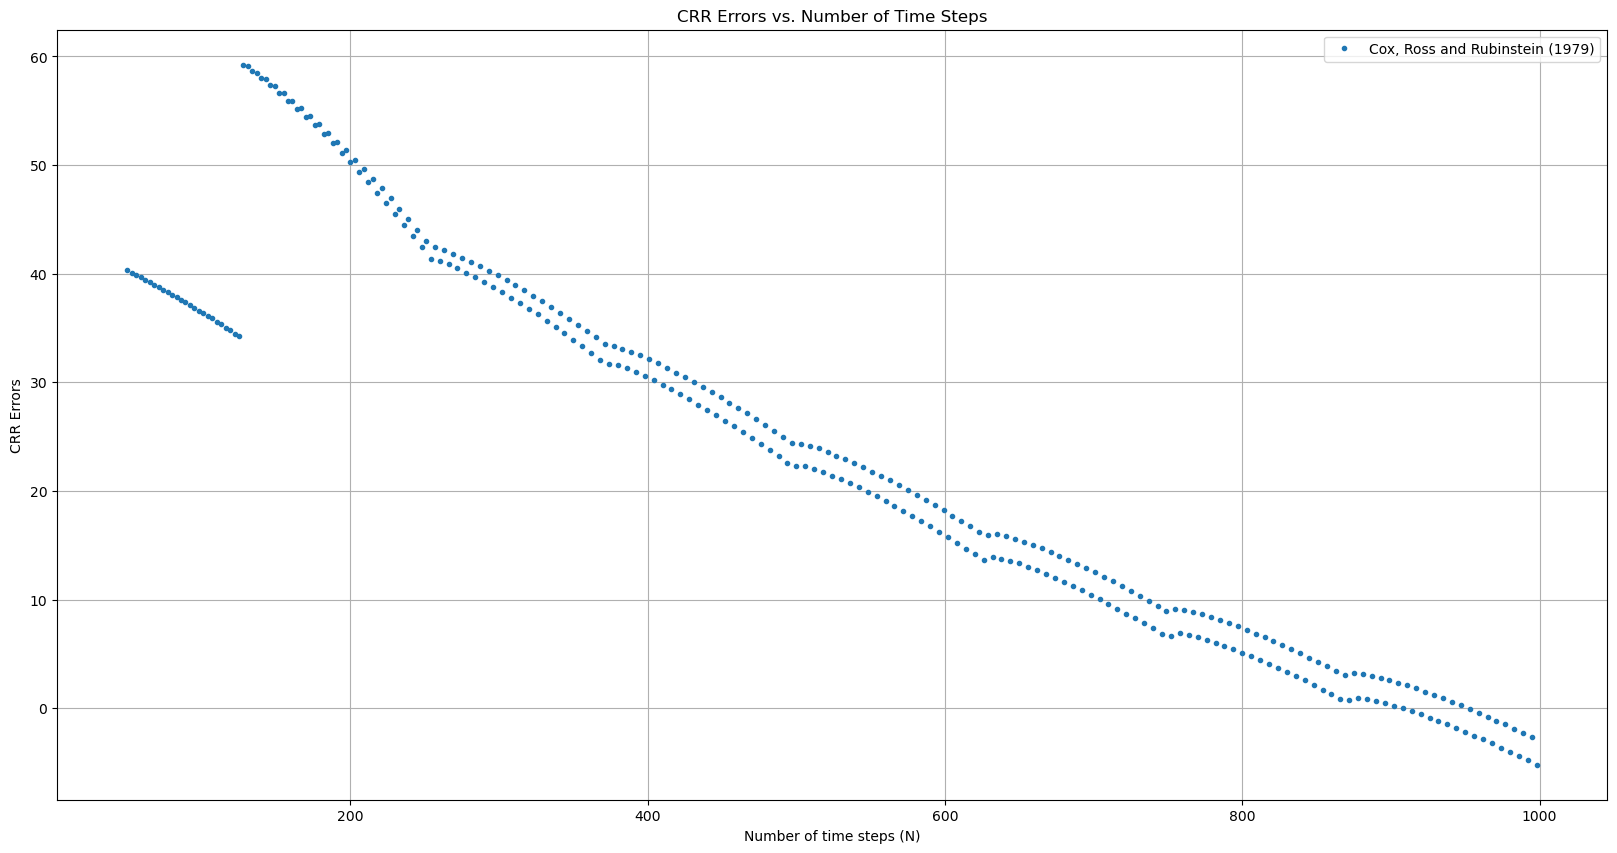

In [46]:
# plotting the error results
plt.figure(figsize=(20, 10))
plt.plot(df_crr['N'],df_crr['Errors'],'o', markersize=3, label='Cox, Ross and Rubinstein (1979)')
plt.xlabel('Number of time steps (N)')
plt.ylabel('CRR Errors')
plt.title('CRR Errors vs. Number of Time Steps')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
N_values = range(50, 1000, 3)
RB_values = []

for i in N_values:
    S, p, u, d, model = Stock_tree(i, S0, B, dt02, sigma, r1, D, T0_T2, model='RB')
    note_value = Note_Value(S, p, i, dt13, call_start_step, observation_steps, r2, model)
    RB_values.append(note_value)

The estimated fair value of the note at moneyness of 80.0 for 50 time steps and RB model is: $1021.8305
The estimated fair value of the note at moneyness of 80.0 for 53 time steps and RB model is: $1021.6032
The estimated fair value of the note at moneyness of 80.0 for 56 time steps and RB model is: $1021.3758
The estimated fair value of the note at moneyness of 80.0 for 59 time steps and RB model is: $1021.1487
The estimated fair value of the note at moneyness of 80.0 for 62 time steps and RB model is: $1020.9209
The estimated fair value of the note at moneyness of 80.0 for 65 time steps and RB model is: $1020.6939
The estimated fair value of the note at moneyness of 80.0 for 68 time steps and RB model is: $1020.4648
The estimated fair value of the note at moneyness of 80.0 for 71 time steps and RB model is: $1020.2382
The estimated fair value of the note at moneyness of 80.0 for 74 time steps and RB model is: $1020.0067
The estimated fair value of the note at moneyness of 80.0 for 77

In [43]:
# assuming note value to be $981.50
RB_errors = [(value - 981.50) for value in RB_values]

In [44]:
df_rb = pd.DataFrame({
    'N': N_values,
    'Note_Value': RB_values,
    'Errors': RB_errors
})

# Add better column names and reset index if needed
df_rb = df_rb.reset_index(drop=True)
df_rb.head()

,N,Note_Value,Errors
0,50,1021.830455,40.330455
1,53,1021.603225,40.103225
2,56,1021.375835,39.875835
3,59,1021.148708,39.648708
4,62,1020.920863,39.420863


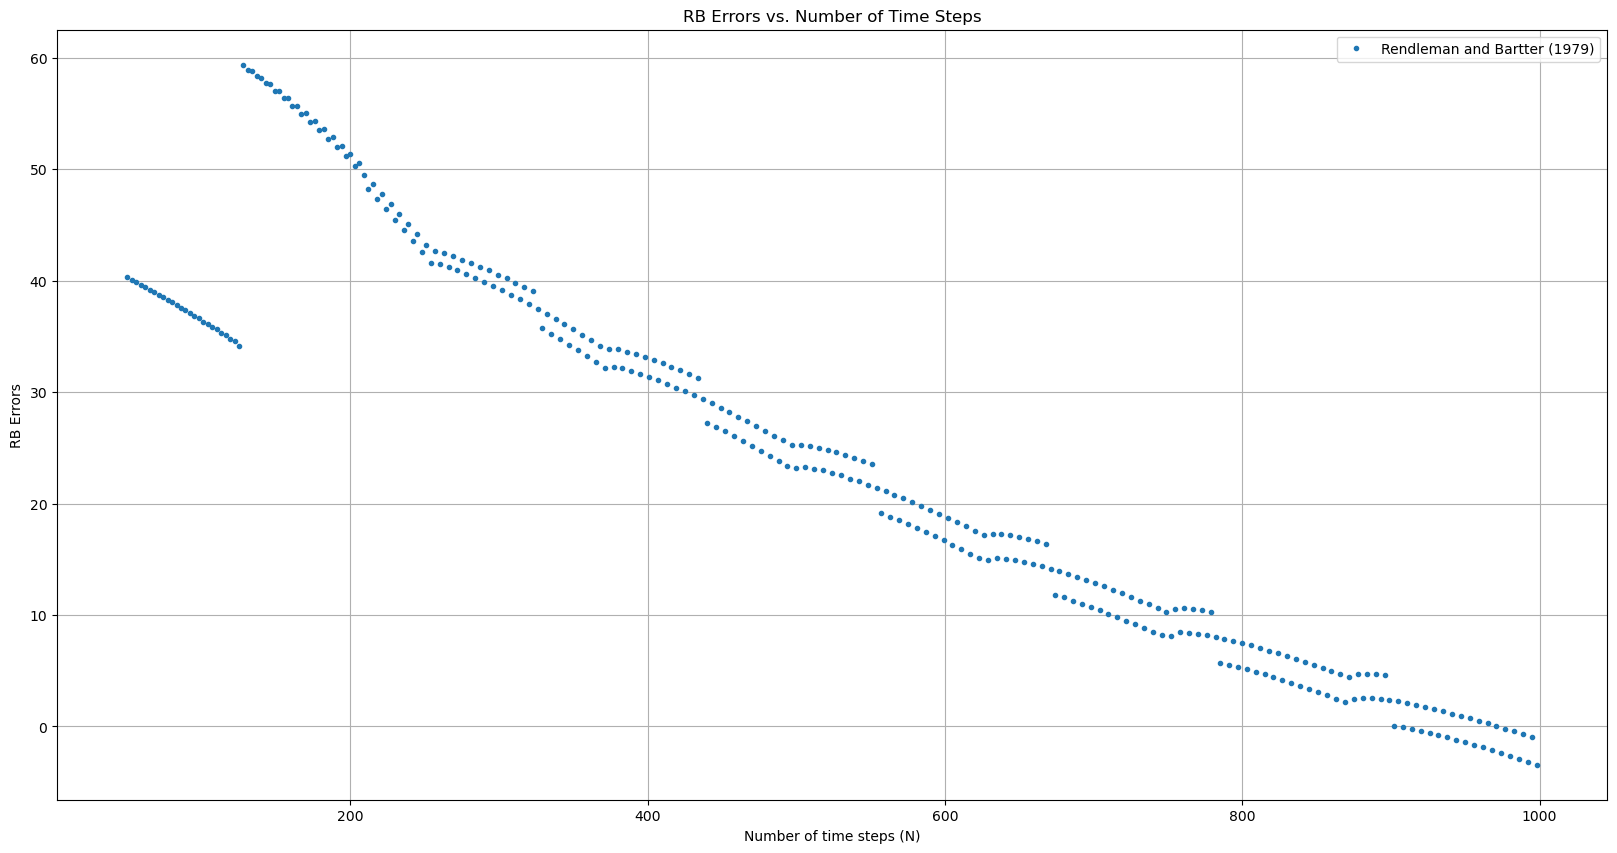

In [47]:
# plotting the error results
plt.figure(figsize=(20, 10))
plt.plot(df_rb['N'],df_rb['Errors'],'o', markersize=3, label='Rendleman and Bartter (1979)')
plt.xlabel('Number of time steps (N)')
plt.ylabel('RB Errors')
plt.title('RB Errors vs. Number of Time Steps')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
N_values = range(50, 1000, 3)
LR_values = []

for i in N_values:
    S, p, u, d, model = Stock_tree(i, S0, B, dt02, sigma, r1, D, T0_T2, model='LR')
    note_value = Note_Value(S, p, i, dt13, call_start_step, observation_steps, r2, model)
    LR_values.append(note_value)

The estimated fair value of the note at moneyness of 80.0 for 50 time steps and LR model is: $932.6062
The estimated fair value of the note at moneyness of 80.0 for 53 time steps and LR model is: $916.6761
The estimated fair value of the note at moneyness of 80.0 for 56 time steps and LR model is: $931.3394
The estimated fair value of the note at moneyness of 80.0 for 59 time steps and LR model is: $916.2559
The estimated fair value of the note at moneyness of 80.0 for 62 time steps and LR model is: $930.1961
The estimated fair value of the note at moneyness of 80.0 for 65 time steps and LR model is: $915.8358
The estimated fair value of the note at moneyness of 80.0 for 68 time steps and LR model is: $929.1488
The estimated fair value of the note at moneyness of 80.0 for 71 time steps and LR model is: $915.4159
The estimated fair value of the note at moneyness of 80.0 for 74 time steps and LR model is: $928.1781
The estimated fair value of the note at moneyness of 80.0 for 77 time ste

In [49]:
# assuming note value to be $981.50
LR_errors = [(value - 981.50) for value in LR_values]

In [50]:
df_lr = pd.DataFrame({
    'N': N_values,
    'Note_Value': LR_values,
    'Errors': LR_errors
})

# Add better column names and reset index if needed
df_lr = df_lr.reset_index(drop=True)
df_lr.head()

,N,Note_Value,Errors
0,50,932.606163,-48.893837
1,53,916.676086,-64.823914
2,56,931.339425,-50.160575
3,59,916.255869,-65.244131
4,62,930.196092,-51.303908


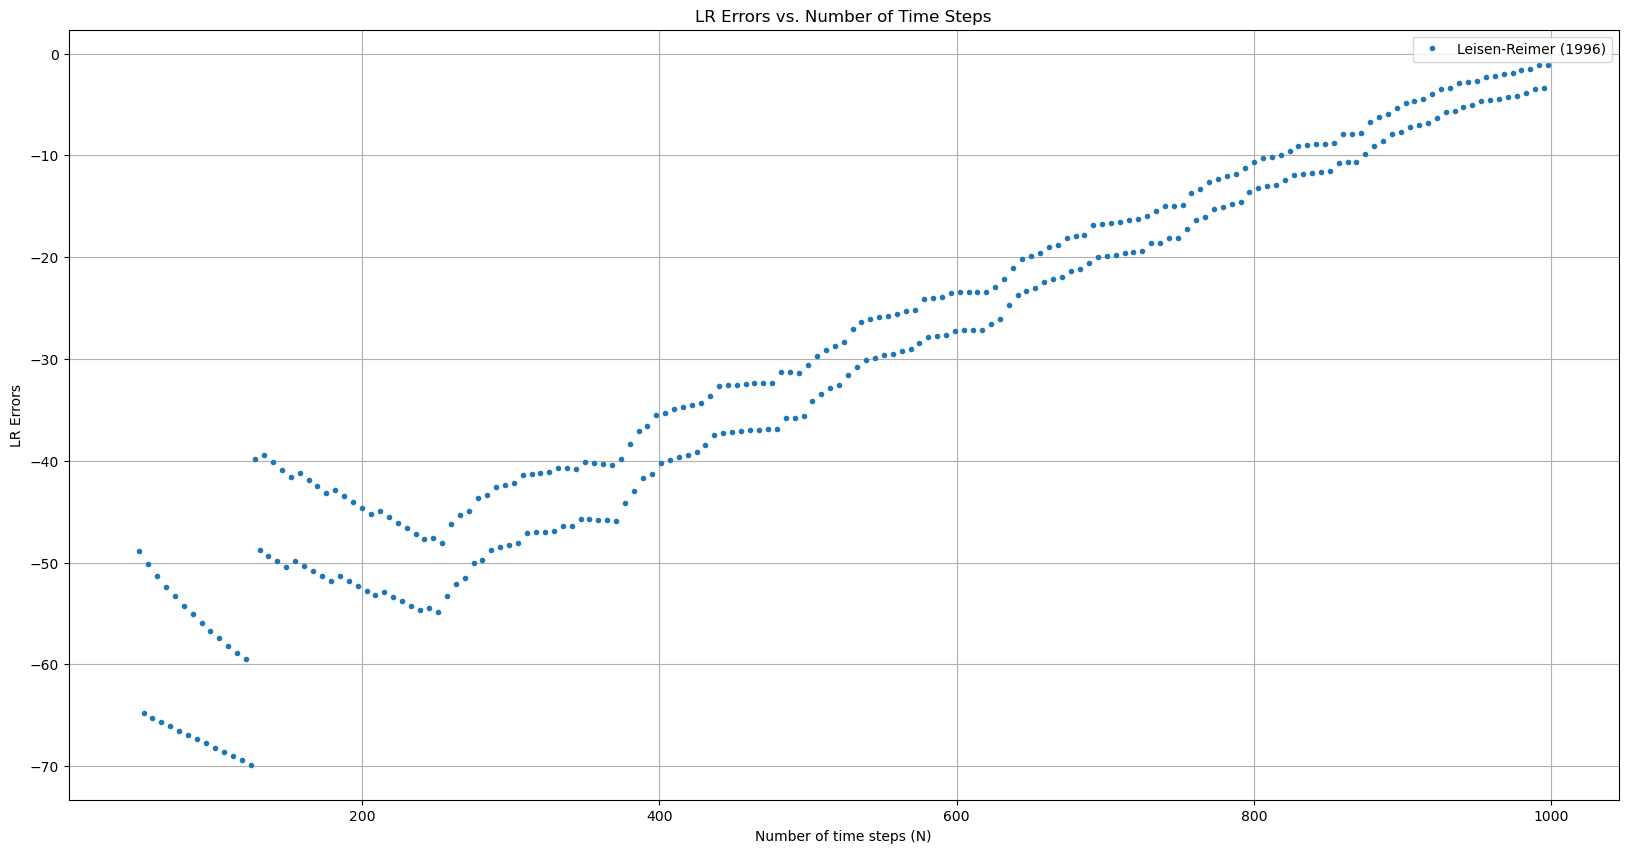

In [51]:
# plotting the error results
plt.figure(figsize=(20, 10))
plt.plot(df_lr['N'],df_lr['Errors'],'o', markersize=3, label='Leisen-Reimer (1996)')
plt.xlabel('Number of time steps (N)')
plt.ylabel('LR Errors')
plt.title('LR Errors vs. Number of Time Steps')
plt.legend()
plt.grid(True)
plt.show()

In [52]:
l1 = []
for i in range(50,1000,5):
    S, p, u, d = Stock_tree(i, S0, B, dt02, sigma, r1, D, T0_T2, model='LR')
    note_value = Note_Value(S, p, i, dt13, call_start_step, observation_steps, r2)
    l1.append(note_value)

The estimated fair value of the note is: $923.9114
The estimated fair value of the note is: $907.0409
The estimated fair value of the note is: $921.8011
The estimated fair value of the note is: $906.3464
The estimated fair value of the note is: $920.0011
The estimated fair value of the note is: $905.6524
The estimated fair value of the note is: $918.4125
The estimated fair value of the note is: $904.9588
The estimated fair value of the note is: $916.9757
The estimated fair value of the note is: $904.2658
The estimated fair value of the note is: $915.6523
The estimated fair value of the note is: $903.5732
The estimated fair value of the note is: $914.4163
The estimated fair value of the note is: $902.8811
The estimated fair value of the note is: $913.2494
The estimated fair value of the note is: $902.1896
The estimated fair value of the note is: $932.0634
The estimated fair value of the note is: $922.5615
The estimated fair value of the note is: $932.0458
The estimated fair value of the

In [40]:
np.mean(l1)

975.7674495500747

In [24]:
import numpy as np

def val(sig, l1):
    # Note Features
    S0 = 41.76                 # Initial stock price ($)
    K = 25.06                  # Coupon barrier and downside threshold ($)
    coupon_rate = 0.1025       # Contingent coupon rate per annum
    coupon_payment = 25.625    # Contingent coupon per observation date ($)
    principal = 1000           # Principal amount per note ($)
    share_delivery_amount = 23.9464  # Shares delivered if below threshold at maturity
    call_start_step = 2        # Issuer can call starting from the second observation date

    # Market Parameters
    r1 = 0.037242092 # Risk-free interest rate (2%)
    r2 = 0.037098736
    q = 0.04842                  # Dividend yield (3%)
    sigma = sig              # Stock volatility (25%)

    # Time Parameters
    T = 2.0                    # Total time to maturity (2 years)
    N = 8                     # Number of time steps (quarterly observations)
    dt = T / N                 # Time step size

    # Binomial Tree Parameters
    u = np.exp(sigma * np.sqrt(dt))        # Up factor
    d = np.exp(-sigma * np.sqrt(dt))       # Down factor
    p = (np.exp((r1 - q) * dt) - d) / (u - d)  # Risk-neutral probability

    # Check for arbitrage
    if not (0 < p < 1):
        raise ValueError("Risk-neutral probability is not between 0 and 1. Check parameters.")

    # Build Stock Price Tree
    stock_tree = np.zeros((N + 1, N + 1))
    for i in range(N + 1):
        for j in range(i + 1):
            stock_tree[j, i] = S0 * (u ** (i - j)) * (d ** j)

    # Initialize Payoff Matrix
    value_tree = np.zeros_like(stock_tree)

    # Determine Payoffs at Maturity
    for j in range(N + 1):
        S_T = stock_tree[j, N]
        if S_T >= K:
            # Receive principal back
            value_tree[j, N] = principal + (coupon_payment if S_T >= K else 0)
        else:
            # Receive share delivery amount
            value_tree[j, N] = share_delivery_amount * S_T

    # Backward Induction
    for i in range(N - 1, -1, -1):
        for j in range(i + 1):
            S_t = stock_tree[j, i]
            # Calculate expected continuation value
            continuation_value = np.exp(-r2 * dt) * (p * value_tree[j, i + 1] + (1 - p) * value_tree[j + 1, i + 1])
            
            # Add contingent coupon if barrier is breached
            if S_t >= K:
                continuation_value += coupon_payment
            
            # Check if issuer will call the note
            if i >= call_start_step:
                # Calculate call payoff
                call_payoff = principal + (coupon_payment if S_t >= K else 0)
                # Issuer will call if it's optimal
                node_value = min(call_payoff, continuation_value)
            else:
                node_value = continuation_value
            
            value_tree[j, i] = node_value

    # Output the Note's Present Value
    note_value = value_tree[0, 0]
    l1.append(note_value)
    print(f"The estimated fair value of the note is: ${note_value:.2f}")

In [25]:
sig = [0.37779, 0.36529, 0.34846, 0.33187, 0.31841, 0.30770, 0.29896, 0.29334, 0.28662]

In [26]:
l1 = []
for i in sig:
    val(i, l1)

The estimated fair value of the note is: $964.12
The estimated fair value of the note is: $967.68
The estimated fair value of the note is: $972.47
The estimated fair value of the note is: $990.76
The estimated fair value of the note is: $994.49
The estimated fair value of the note is: $997.46
The estimated fair value of the note is: $999.89
The estimated fair value of the note is: $1001.44
The estimated fair value of the note is: $1003.31


In [27]:
l1

[964.1173849424858,
 967.6795239820171,
 972.4709589524332,
 990.7606836194402,
 994.4942125263381,
 997.463773396379,
 999.8863714469996,
 1001.4438120189466,
 1003.3057516654233]

In [29]:
np.mean(l1)

987.9580525056068

In [ ]:
import numpy as np

In [17]:
dt = (2*365+2)/365
dt

2.0054794520547947

In [14]:
r1 = np.log(0.927865)/dt

In [15]:
r1

-0.03717985889038573